In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/home/jose/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [74]:
def extract_data(df):
    X = pd.get_dummies(df[["Pclass", "Sex"]])
    X["Has_SibSp"] = df["SibSp"] > 0
    X["Has_Parch"] = df["Parch"] > 0
    X["Is_Children"] = df["Age"] < 12
    X["Is_Adult"] = (df["Age"] >= 12) & (df["Age"] < 55)
    X["Is_Elder"] = df["Age"] >= 55
    X = X.applymap(lambda x: 1 if x else 0)
    dictionary = list(X.columns.values)
    if "Survived" in df.columns.values:
        Y = df["Survived"]
    else:
        Y = None
    return X, Y, dictionary

In [87]:
df = pd.read_csv("train.csv")
X, y, dictionary = extract_data(df)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

In [122]:
from sklearn.tree import DecisionTreeClassifier

# all possible trees and predictions from depth 1 to the total number of features
# it averages number of predictions that are equal, by using mean 
trees = []
preds_train = []
preds_dev = []
preds_test = []
for depth in range(1, len(dictionary) + 1):
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    trees.append(tree)
    preds_train.append(np.mean(tree.predict(X_train) == y_train))
    preds_dev.append(np.mean(tree.predict(X_dev) == y_dev))
    preds_test.append(np.mean(tree.predict(X_test) == y_test))

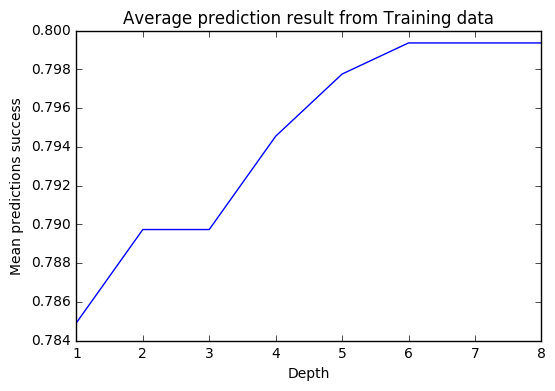

In [125]:
# Plot Training
plt.plot(range(1, len(dictionary) + 1), preds_train)
plt.title("Average prediction result from Training data")
plt.xlabel("Depth")
plt.ylabel("Mean predictions success")
plt.show()

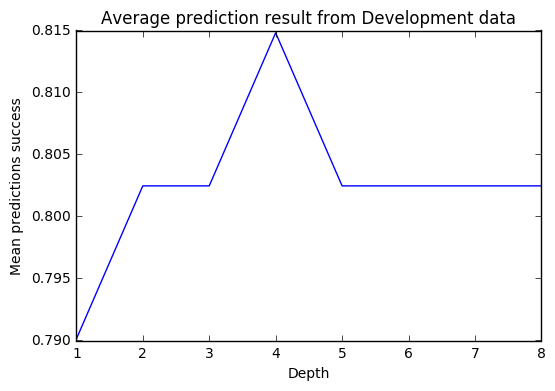

In [126]:
# Plot Development
plt.plot(range(1, len(dictionary) + 1), preds_dev)
plt.title("Average prediction result from Development data")
plt.xlabel("Depth")
plt.ylabel("Mean predictions success")
plt.show()

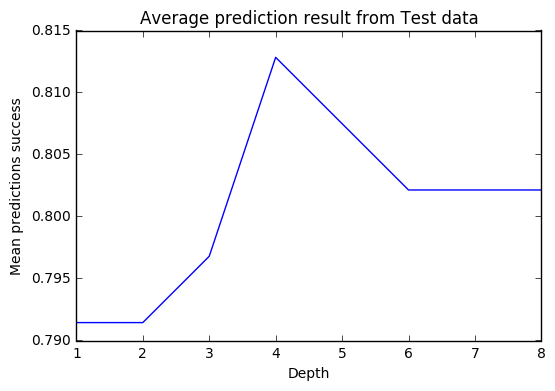

In [127]:
# Plot Development
plt.plot(range(1, len(dictionary) + 1), preds_test)
plt.title("Average prediction result from Test data")
plt.xlabel("Depth")
plt.ylabel("Mean predictions success")
plt.show()

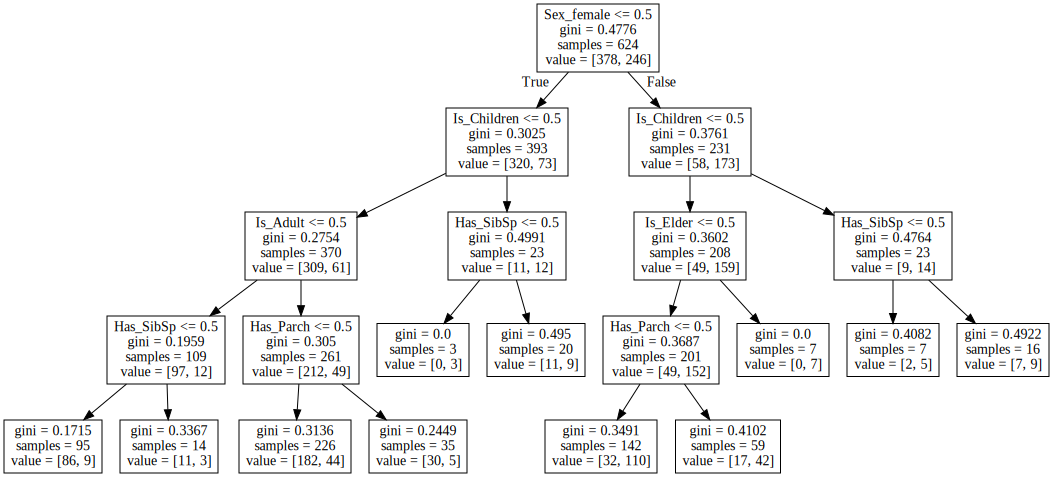

In [120]:
with open("mytree4.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [152]:
# Submission. Prepare predictions
df_final = pd.read_csv("test.csv")
X_final, _y, _d = extract_data(df_final)

df_submission = df_final[["PassengerId"]]
df_submission.insert(1, "Survived", trees[4].predict(X_final))
df_submission.to_csv("submission.csv", index=False)